### PPOL564 | Data Science 1: Foundations | 
#### Final Project code for analysis of Mexico and Guatemala data
####  Alvaro Altamirano Montoya

### I. Dependencies

In [6]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
#import missingno as miss

# Plotting libraries
import plotly.express as px
from plotly.offline import plot, init_notebook_mode, iplot
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")


import math
from numpy import sqrt 
import os

# Set WD
path = r'C:\Users\unily\Documents\Georgetown\PPOL 564 - Intro to Data Science\project'
os.chdir(path)

### II. Loading and wrangling data

In [7]:
# Misc
import warnings
warnings.filterwarnings("ignore")
# Data Management/Investigation
import pandas as pd
# Plotting libraries
import plotly.express as px
from plotly.offline import plot, init_notebook_mode, iplot

df = pd.read_csv("data\df.csv")
df2= df[df['country']=='mx'].copy()
df = df[df['country']=='gt']
df.reset_index(drop=True, inplace=True)
#Create df of missing values by variable
df_merged_pctna = (df.isnull().sum() * 100 / len(df)).round(1).sort_values(ascending = False)
df.reset_index(drop=True, inplace=True)
#Create df of missing values by variable
df_merged_pctna2 = (df2.isnull().sum() * 100 / len(df2)).round(1).sort_values(ascending = False)

In [8]:
# Figure 2a. An overview of the relational datasets: Guatemala.
# create missing values' bar graph
fig = px.bar(df_merged_pctna, x=df_merged_pctna.index.values, y=df_merged_pctna,
             template="simple_white", text = df_merged_pctna,
             title= 'Figure 2a: Percent of missing values in Guatemala\'s dataset')
fig.update_layout(showlegend=False,
                xaxis_title="Variables",
                yaxis_title="Percent missing (%)",
                font_family="Arial",
                title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19,
                legend_title_font_color="green")
fig.update_traces(textposition='inside')
#### Display figure
#### Save figure
fig.write_image("assets/fig2a.png", width=800, height=650)
iplot(fig)

# 2B
# Figure 2b. An overview of the relational datasets: Mexico.
# create missing values' bar graph
fig = px.bar(df_merged_pctna2, x=df_merged_pctna2.index.values, y=df_merged_pctna2,
             template="simple_white", text = df_merged_pctna2,
             title= 'Figure 2b: Percent of missing values in Mexico\'s dataset')
fig.update_layout(showlegend=False,
                xaxis_title="Variables",
                yaxis_title="Percent missing (%)",
                font_family="Arial",
                title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19,
                legend_title_font_color="green")
fig.update_traces(textposition='inside')
#### Display figure
#### Save figure
fig.write_image("assets/fig2b.png", width=800, height=650)

iplot(fig)

In [9]:
# 3a, Guatemala 
df4 = df.groupby([df.date_posted])['count'].\
            sum().reset_index()
df4['conteo_MA'] = df4['count'].transform(lambda x: x.rolling(7, 1).mean()) 

df4 = df4.loc[pd.to_datetime(df4.date_posted).dt.year>2019]
#Create Figure
fig3a = px.line(df4, x='date_posted', y='conteo_MA', 
                  title = 'Figure 3a. Weekly new vacancies for Guatemala',
               template ='simple_white'
                 )
fig3a.update_layout(showlegend=False,
                xaxis_title="Date (weeks in ISO 8601)",
                yaxis_title="New downloaded vacancies",
                font_family="Arial",
                title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19,
                legend_title_font_color="green",
                uniformtext_minsize=14, 
                uniformtext_mode=False)
fig3a.update_traces(textposition='middle right')
fig3a.update_xaxes(showline=True, linewidth=2, linecolor='black', showspikes=True)
fig3a.update_yaxes(showline=True, linewidth=2, linecolor='black', showspikes=True)

#### Display figure
#### Save figure
fig3a.write_image("assets/fig3a.png", width=800, height=650)

iplot(fig3a)

# 3b, Mexico
df3 = df2.groupby([df2.date_posted])['count'].\
            sum().reset_index()
df3['conteo_MA'] = df3['count'].transform(lambda x: x.rolling(7, 1).mean()) 

df3 = df3.loc[pd.to_datetime(df3.date_posted).dt.year>2019]
#Create Figure
fig3b = px.line(df3, x='date_posted', y='conteo_MA', 
                  title = 'Figure 3b. Weekly new vacancies for Mexico',
               template ='simple_white'
                 )
fig3b.update_layout(showlegend=False,
                xaxis_title="Date (weeks in ISO 8601)",
                yaxis_title="New downloaded vacancies",
                font_family="Arial",
                title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19,
                legend_title_font_color="green",
                uniformtext_minsize=14, 
                uniformtext_mode=False)
fig3b.update_traces(textposition='middle right')
fig3b.update_xaxes(showline=True, linewidth=2, linecolor='black', showspikes=True)
fig3b.update_yaxes(showline=True, linewidth=2, linecolor='black', showspikes=True)

#### Display figure
#### Save figure
fig3b.write_image("assets/fig3b.png", width=800, height=650)

iplot(fig3b)

### Data wrangling, transformations, and ML preparations (Mexico)

In [10]:
df = pd.read_csv("data\df.csv")[50000:100000]
df= df[df['country']=='mx']
df.reset_index(drop=True, inplace=True)

#Trimming outliers from dependent variable and other independent continous variables
#And 
# Fill numeric columns with the mean
num_vars = df[['salary','experience']]
for col in num_vars:
    df['std'] = df[col].std()
    df['mean'] = df[col].mean()
    df[col].fillna((df[col].mean()), inplace=True)
    df = df[~(np.abs(df[col]-df['mean']) > (2*df['std']))]

#Filling age's missing values with the average
df.age.fillna((df.age.mean()), inplace=True)
#Trimming wages below minimum wage
df= df[df.salary >600]

# Final split test/train for Machine Learning Pipelines
y = np.log(df['salary'] + 100).astype('float')
X = df.drop(columns=['salary', 'id','count', 'date', 'city','week','date_posted', 'country', 'title', 'firm', 'knowledge', 'languages', 'mean', 'std'])
# Convert all categorical variables in the data to numeric values
for col in X.select_dtypes(include=['object']).copy():
    print(col)
    X[col] = X[col].astype('category')
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)    
    
# Train/test split   
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=1234)

education
gender
contract_type
disability
firm_size


In [11]:
### Machine Learning Battery

In [12]:
search_space = [
    
    # Lasso, 0
    {'model': [linear_model.Lasso()]},
    
    # Linear, 6
    {'model': [LinearRegression()]},
    
    # Elastic Net, 0
    {'model': [ElasticNet()]},
    
    # Bayesian Ridge, 6
    {'model': [BayesianRidge()]},
    
    # LGM, 19
    {'model': [LGBMRegressor()],
    'model__max_depth':[2,3, 4],
    'model__n_estimators':[500,1000, 1500],
    'model__max_features':['sqrt']},
    
    # Gradient Boost, 11
    {'model': [GradientBoostingRegressor()],
    'model__max_depth':[2,3, 4],
    'model__n_estimators':[500,1000],
    'model__max_features':['sqrt']},
    
    # SVR, 10
    {'model': [SVR()]},
    
    # XGB
    {'model': [XGBRegressor()]},
    
    # Cat
    {'model': [CatBoostRegressor()]},
    
    # SGDR
    {'model': [SGDRegressor()]},
    
    # Kernel ridge
    {'model': [KernelRidge()]}

]


# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=1234)

# Generate pipeline object
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

#Create grid-search object
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_absolute_error',
                      n_jobs=-1)

# Fit search pipeline using train data
search.fit(train_X,train_y)
rf_mod = search.best_estimator_
rf_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

### Printing the best model fit's results

In [13]:
print(" Results from Grid Search: " )
print("\n The best estimator across ALL searched params:\n",search.best_estimator_)
print("\n The best score across ALL searched params:\n",search.best_score_)
print("\n The best parameters across ALL searched params:\n",search.best_params_)
# R_squared and Root Mean Squared Error on train and test data
print('R_squared on train data: ', m.r2_score(train_y,rf_mod.predict(train_X)))
print('R_squared on test data: ', m.r2_score(test_y,rf_mod.predict(test_X)))
print('RMSE on train data: ', m.mean_squared_error(train_y,rf_mod.predict(train_X))**(0.5))
print('RMSE on test data: ',  m.mean_squared_error(test_y,rf_mod.predict(test_X))**(0.5))

 Results from Grid Search: 

 The best estimator across ALL searched params:
 Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_param

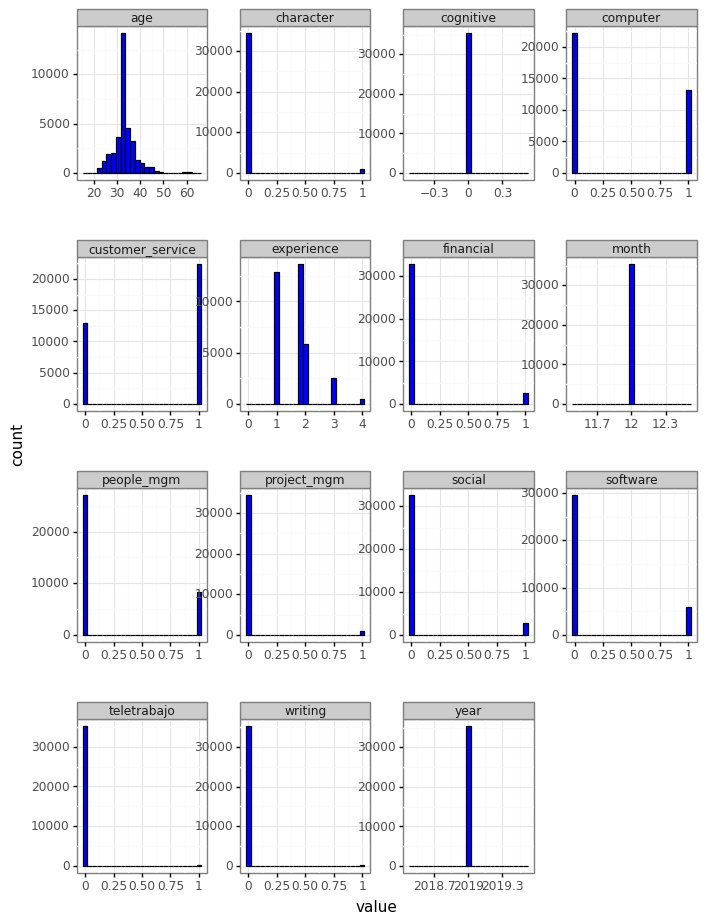

<ggplot: (-9223371887827569236)>

In [14]:
# Plot the continuous Variables 
temp1 = train_X.select_dtypes(include=["int64","float64"]).melt()
(
    ggplot(temp1,aes(x="value")) +
    geom_histogram(bins=25, color ="black", fill="blue") +
    facet_wrap("variable",scales='free') +
    theme_bw()+
    theme(figure_size=(8,11),
          subplots_adjust={'wspace':0.25, 'hspace':0.5})
)

In [15]:
print(" Results from Grid Search: " )
print("\n The best estimator across ALL searched params:\n",search.best_estimator_)
print("\n The best score across ALL searched params:\n",search.best_score_)
print("\n The best parameters across ALL searched params:\n",search.best_params_)
# R_squared and Root Mean Squared Error on train and test data
print('R_squared on train data: ', m.r2_score(train_y,rf_mod.predict(train_X)))
print('R_squared on test data: ', m.r2_score(test_y,rf_mod.predict(test_X)))
print('RMSE on train data: ', m.mean_squared_error(train_y,rf_mod.predict(train_X))**(0.5))
print('RMSE on test data: ',  m.mean_squared_error(test_y,rf_mod.predict(test_X))**(0.5))

 Results from Grid Search: 

 The best estimator across ALL searched params:
 Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_param

#### Regression fit graphs

In [17]:
import plotly.express as px
import plotly.graph_objects as go
# regression
# plotly figure setup
fig=go.Figure()
fig.add_trace(go.Scatter(name='Fit & Observed ln(salaries)', x=rf_mod.predict(test_X), y=test_y, mode='markers'))
fig.add_trace(go.Scatter(name='Line of best fit', x=rf_mod.predict(test_X), y=rf_mod.predict(test_X), mode='lines'))

# plotly figure layout
fig.update_layout(template="simple_white",
                  title={'text': "Figure 5a. Mexico: Model's fitted/predicted values"},
                  barmode='overlay',
                 height=680,
                showlegend=False,
                xaxis_title="Predicted values", yaxis_title="Observed values",
                font_family="Arial", title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19, legend_title_font_color="black"
                 )

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
              marker_line_width=1.5, opacity=0.6)

fig.add_annotation(
    text="Source: Authors' elaboration.",
    xref="x domain", yref="y domain",x=0.01, y=-0.14,showarrow=False)
#### Display figure
#### Save figure
fig.write_image("assets/fig5B.png", width=800, height=650)

iplot(fig)

#### Permutation Analysis

In [18]:
# preparing permutation importance object
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=25)

In [19]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std  \
0                                                 age  0.213441  0.002070   
1                                          experience  0.144946  0.002147   
2        education_ educacion superior - licenciatura  0.130377  0.002492   
3                     education_ educacion secundaria  0.046671  0.001375   
4                                            computer  0.035484  0.000874   
5                                    customer_service  0.029500  0.000896   
6                firm_size_MÃ¡s de 1,000 trabajadores  0.024710  0.000514   
7   education_ educacion media superior -bachiller...  0.024628  0.000733   
8                       education_ educacion primaria  0.023518  0.000856   
9                    firm_size_501-1,000 trabajadores  0.022623  0.000561   
10                     firm_size_201-500 trabajadores  0.022093  0.000706   
11                      firm_size_51-200 trabajadores  0.021434  0.000790   
12                contract_type_Otro tipo de contrato  0.020976  0.000625   
13                                         people_mgm  0.020571  0.000554   
14                                  gender_indistinto  0.020192  0.000687   
15                                           software  0.019227  0.000659   
16                                             social  0.012351  0.000567   
17    contract_type_Contrato por tiempo indeterminado  0.012238  0.000362   
18                                          character  0.011971  0.000489   
19                                        project_mgm  0.011258  0.000486   
20                       firm_size_11-50 trabajadores  0.010226  0.000338   
21                                          financial  0.009735  0.000292   
22               contract_type_Contrato por temporada  0.008585  0.000381   
23       education_ educacion superior - especialidad  0.008266  0.000523   
24                                        teletrabajo  0.006042  0.000221   
25  education_ educacion media superior - educacio...  0.005228  0.000295   
26                                     gender_mujeres  0.003121  0.000162   
27                                            writing  0.002095  0.000177   
28           education_ educacion superior - maestria  0.001412  0.000162   
29                                 gender_indiferente  0.000277  0.000067   
30          education_ educacion superior - doctorado  0.000157  0.000043   
31                                          cognitive  0.000000  0.000000   
32                                              month  0.000000  0.000000   
33                                               year  0.000000  0.000000   

         low      high  
0   0.209302  0.217580  
1   0.140652  0.149239  
2   0.125393  0.135360  
3   0.043921  0.049420  
4   0.033736  0.037231  
5   0.027708  0.031292  
6   0.023682  0.025739  
7   0.023163  0.026093  
8   0.021805  0.025231  
9   0.021500  0.023746  
10  0.020680  0.023506  
11  0.019855  0.023013  
12  0.019725  0.022226  
13  0.019464  0.021678  
14  0.018817  0.021567  
15  0.017909  0.020545  
16  0.011217  0.013484  
17  0.011513  0.012962  
18  0.010993  0.012950  
19  0.010285  0.012231  
20  0.009550  0.010901  
21  0.009152  0.010318  
22  0.007822  0.009347  
23  0.007219  0.009312  
24  0.005600  0.006483  
25  0.004638  0.005817  
26  0.002796  0.003446  
27  0.001741  0.002448  
28  0.001087  0.001736  
29  0.000143  0.000411  
30  0.000071  0.000243  
31  0.000000  0.000000  
32  0.000000  0.000000  
33  0.000000  0.000000

In [20]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(
name='Control', x=vi_dat.variable, y=vi_dat.vi,
error_y=dict(type='data', array=vi_dat['std'])))

fig.update_layout(template="simple_white",
                  title={'text': "Figure 4b. Mexico: Variable importance"},
                  barmode='overlay',
                 height=780,
                showlegend=False,
                xaxis_title="Features (variables)", yaxis_title="Post-permutation importance metric",
                font_family="Arial", title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19, legend_title_font_color="black"
                 )

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
              marker_line_width=1.5, opacity=0.6)

#### Display figure
#### Save figure
fig.write_image("assets/fig4b.png", width=800, height=650)

iplot(fig)

### Data wrangling, transformations, and ML preparations (Guatemala)

education
gender
contract_type
disability
firm_size


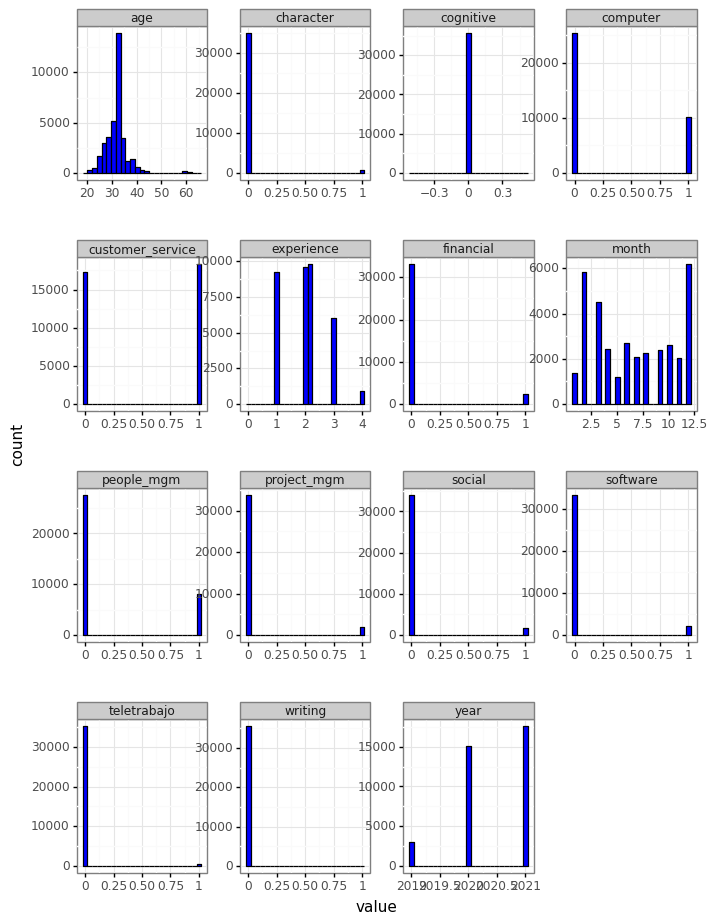

<ggplot: (-9223371887815035120)>

In [21]:
#Load the data
df = pd.read_csv("data\df.csv")
df= df[df['country']=='gt']
df.reset_index(drop=True, inplace=True)

#Trimming outliers from dependent variable and other independent continous variables
#And 
# Fill numeric columns with the mean
num_vars = df[['salary','experience']]
for col in num_vars:
    df['std'] = df[col].std()
    df['mean'] = df[col].mean()
    df[col].fillna((df[col].mean()), inplace=True)
    df = df[~(np.abs(df[col]-df['mean']) > (2*df['std']))]

#Filling age's missing values with the average
df.age.fillna((df.age.mean()), inplace=True)
#Trimming wages below minimum wage
df= df[df.salary >600]

# Final split test/train for Machine Learning Pipelines
y = np.log(df['salary'] + 100).astype('float')
X = df.drop(columns=['salary', 'id','count', 'date', 'city','week','date_posted', 'country', 'title', 'firm', 'knowledge', 'languages', 'mean', 'std'])
# Convert all categorical variables in the data to numeric values
for col in X.select_dtypes(include=['object']).copy():
    print(col)
    X[col] = X[col].astype('category')
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)    
    
# Train/test split   
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=747)

# Plot the continuous Variables 
temp1 = train_X.select_dtypes(include=["int64","float64"]).melt()
(
    ggplot(temp1,aes(x="value")) +
    geom_histogram(bins=25, color ="black", fill="blue") +
    facet_wrap("variable",scales='free') +
    theme_bw()+
    theme(figure_size=(8,11),
          subplots_adjust={'wspace':0.25, 'hspace':0.5})
)

### Machine Learning Battery

In [22]:
search_space = [
    
    # Lasso, 0
    {'model': [linear_model.Lasso()]},
    
    # Linear, 6
    {'model': [LinearRegression()]},
    
    # Elastic Net, 0
    {'model': [ElasticNet()]},
    
    # Bayesian Ridge, 6
    {'model': [BayesianRidge()]},
    
    # LGM, 19
    {'model': [LGBMRegressor()],
    'model__max_depth':[2,3, 4],
    'model__n_estimators':[500,1000, 1500],
    'model__max_features':['sqrt']},
    
    # Gradient Boost, 11
    {'model': [GradientBoostingRegressor()],
    'model__max_depth':[2,3, 4],
    'model__n_estimators':[500,1000],
    'model__max_features':['sqrt']},
    
    # SVR, 10
    {'model': [SVR()]},
    
    # XGB
    {'model': [XGBRegressor()]},
    
    # Cat
    {'model': [CatBoostRegressor()]},
    
    # SGDR
    {'model': [SGDRegressor()]},
    
    # Kernel ridge
    {'model': [KernelRidge()]}

]


# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=1234)

# Generate pipeline object
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

#Create grid-search object
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_absolute_error',
                      n_jobs=-1)

# Fit search pipeline using train data
search.fit(train_X,train_y)
rf_mod = search.best_estimator_
rf_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [24]:
### Printing the best model fit's results
print(" Results from Grid Search: " )
print("\n The best estimator across ALL searched params:\n",search.best_estimator_)
print("\n The best score across ALL searched params:\n",search.best_score_)
print("\n The best parameters across ALL searched params:\n",search.best_params_)
# R_squared and Root Mean Squared Error on train and test data
print('R_squared on train data: ', m.r2_score(train_y,rf_mod.predict(train_X)))
print('R_squared on test data: ', m.r2_score(test_y,rf_mod.predict(test_X)))
print('RMSE on train data: ', m.mean_squared_error(train_y,rf_mod.predict(train_X))**(0.5))
print('RMSE on test data: ',  m.mean_squared_error(test_y,rf_mod.predict(test_X))**(0.5))

#### Regression fit graphs

import plotly.express as px

# regression
# plotly figure setup
fig=go.Figure()
fig.add_trace(go.Scatter(name='Fit & Observed ln(salaries)', x=rf_mod.predict(test_X), y=test_y, mode='markers'))
fig.add_trace(go.Scatter(name='Line of best fit', x=rf_mod.predict(test_X), y=rf_mod.predict(test_X), mode='lines'))

# plotly figure layout
fig.update_layout(template="simple_white",
                  title={'text': "Figure 4a. Guatemala: Model's fitted/predicted values"},
                  barmode='overlay',
                 height=680,
                showlegend=False,
                xaxis_title="Predicted values", yaxis_title="Observed values",
                font_family="Arial", title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19, legend_title_font_color="black"
                 )

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
              marker_line_width=1.5, opacity=0.6)

fig.add_annotation(
    text="Source: Authors' elaboration.",
    xref="x domain", yref="y domain",x=0.01, y=-0.14,showarrow=False)
#### Display figure
#### Save figure
fig.write_image("assets/fig5B.png", width=800, height=650)

iplot(fig)





 Results from Grid Search: 

 The best estimator across ALL searched params:
 Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_param

#### Permutation Analysis

In [25]:
# preparing permutation importance object
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=25)

# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(
name='Control', x=vi_dat.variable, y=vi_dat.vi,
error_y=dict(type='data', array=vi_dat['std'])))

fig.update_layout(template="simple_white",
                  title={'text': "Figure 5b. Guatemala: Variable importance"},
                  barmode='overlay',
                 height=780,
                showlegend=False,
                xaxis_title="Features (variables)", yaxis_title="Post-permutation importance metric",
                font_family="Arial", title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19, legend_title_font_color="black"
                 )

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
              marker_line_width=1.5, opacity=0.6)

#### Display figure
#### Save figure
fig.write_image("assets/fig4b.png", width=800, height=650)

iplot(fig)